In [1]:
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
warnings.filterwarnings("ignore")

In [9]:
!dir

 El volumen de la unidad D no tiene etiqueta.
 El n�mero de serie del volumen es: 08C4-45BE

 Directorio de d:\CODES\Tesis-MIA-UNI\notebooks

30/10/2025  02:56 p.m.    <DIR>          .
30/10/2025  02:50 p.m.    <DIR>          ..
30/10/2025  02:50 p.m.    <DIR>          .ipynb_checkpoints
30/10/2025  02:50 p.m.         2,917,605 1_generacion_DB.ipynb
30/10/2025  03:03 p.m.             2,489 2_1_Feature_Engineering.ipynb
30/10/2025  02:50 p.m.         3,072,312 2_preprocesamiento_DB.ipynb
30/10/2025  02:50 p.m.           538,097 3_Procesamiento.ipynb
30/10/2025  02:50 p.m.         2,006,870 4_GAN_1D.ipynb
30/10/2025  02:50 p.m.       268,009,099 data.csv
30/10/2025  02:50 p.m.    <DIR>          ECG_DATASET
30/10/2025  02:50 p.m.    <DIR>          ECG_DATASET_V2
30/10/2025  02:50 p.m.    <DIR>          RAW_ECG_DATASET
30/10/2025  02:50 p.m.    <DIR>          _OLD
               6 archivos    276,546,472 bytes
               7 dirs  516,008,460,288 bytes libres


In [21]:
path = os.path.join("ECG_DATASET", "dataset_ekg.pkl")
print(path)
print(os.path.exists(path))
print(os.listdir("ECG_DATASET"))

ECG_DATASET\dataset_ekg.pkl
True
['dataset_ecg.zip', 'dataset_ekg.pkl', 'dict_labels.pkl']


In [22]:
import pickle

with open(path, 'rb') as file:
    data = pickle.load(file)
    print("Data loaded successfully.")

data

Data loaded successfully.


{'NSR': array([[-0.06451476, -0.05951476, -0.02951476, ...,  0.13548524,
          0.13048524,  0.11548524],
        [ 0.24548524,  0.25048524,  0.24048524, ...,  0.34048524,
          0.33548524,  0.31548524],
        [ 0.13048524,  0.12548524,  0.11048524, ..., -0.20451476,
         -0.20451476, -0.20451476],
        ...,
        [-0.46451476, -0.46451476, -0.46451476, ..., -0.59451476,
         -0.58951476, -0.58951476],
        [-0.53451476, -0.51451476, -0.53451476, ..., -0.51451476,
         -0.44451476, -0.40451476],
        [ 0.51548524,  0.50548524,  0.50548524, ...,  0.21048524,
          0.20048524,  0.18548524]], shape=(283, 3600)),
 'VT': array([[ 0.10787069,  0.08787069,  0.08787069, ...,  0.01287069,
         -0.00212931,  0.01787069],
        [-0.31212931, -0.29712931, -0.27212931, ...,  0.82787069,
          0.84787069,  0.86787069],
        [ 0.01287069,  0.00787069,  0.00287069, ...,  0.04787069,
          0.06787069,  0.10287069],
        ...,
        [ 0.17287069, 

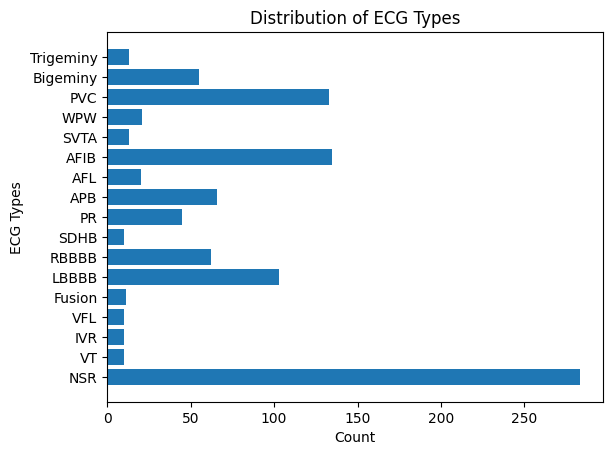

In [33]:
labels = list(data.keys())
counts = [j.shape[0] for j in data.values()]
plt.barh(labels, counts)
plt.xlabel('Count')
plt.ylabel('ECG Types')
plt.title('Distribution of ECG Types')
plt.show()

## Buscando la identidad de las señales 

In [34]:
import pandas as pd

In [35]:
def statistics_extract_features(signal):
    features = {
        'mean': np.mean(signal),
        'std': np.std(signal),
        'median': np.median(signal),
        'min': np.min(signal),
        'max': np.max(signal),
        'ptp': np.ptp(signal), # Peak-to-peak amplitude
        'variance': np.var(signal),
        'skewness': pd.Series(signal).skew(),
        'kurtosis': pd.Series(signal).kurtosis()
    }
    return features


### NSR

In [36]:
# Extract features for each class
data_NSR = data['NSR']
features_NSR = pd.DataFrame([statistics_extract_features(signal) for signal in data_NSR])

features_NSR.head()

,mean,std,median,min,max,ptp,variance,skewness,kurtosis
0,0.160284,0.228847,0.115485,-0.144515,1.705485,1.850,0.052371,3.593412,16.699166
1,0.270717,0.225989,0.235485,-0.494515,1.595485,2.090,0.051071,2.195015,11.268041
2,0.131302,0.266043,0.060485,-0.204515,1.845485,2.050,0.070779,3.475559,14.100811
3,-0.529288,0.337955,-0.604515,-0.959515,1.075485,2.035,0.114213,3.220420,10.432794
4,0.335085,0.299513,0.260485,0.110485,2.380485,2.270,0.089708,4.468361,22.112125


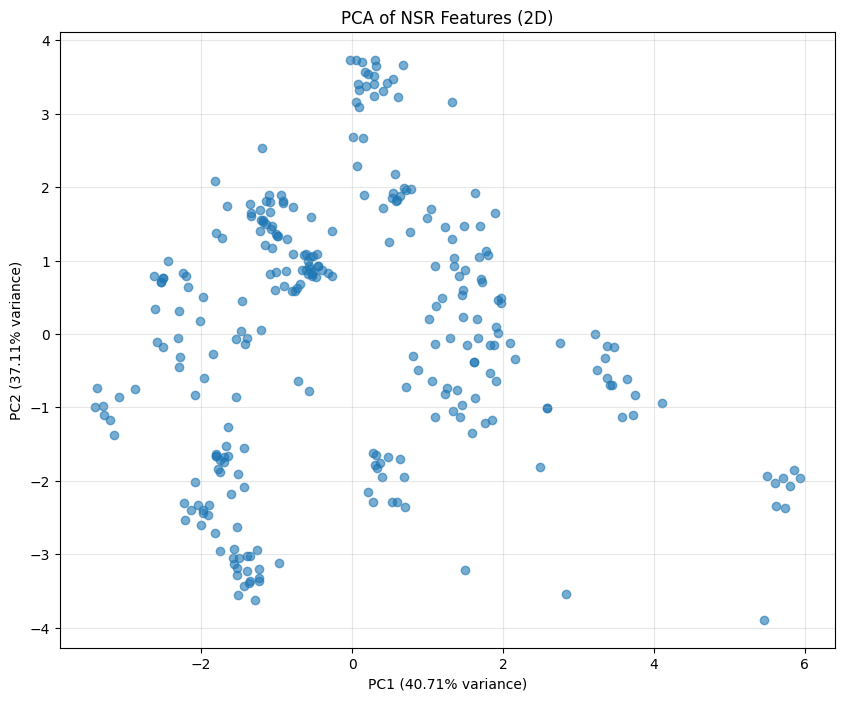

Total variance explained: 77.81%


In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Normalize features_NSR with StandardScaler
scaler = StandardScaler()
features_NSR_scaled = scaler.fit_transform(features_NSR)

# Apply PCA with 2 components
pca = PCA(n_components=2)
features_NSR_pca = pca.fit_transform(features_NSR_scaled)

# Plot the 2D PCA results
plt.figure(figsize=(10, 8))
plt.scatter(features_NSR_pca[:, 0], features_NSR_pca[:, 1], alpha=0.6)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.title('PCA of NSR Features (2D)')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Total variance explained: {sum(pca.explained_variance_ratio_):.2%}")

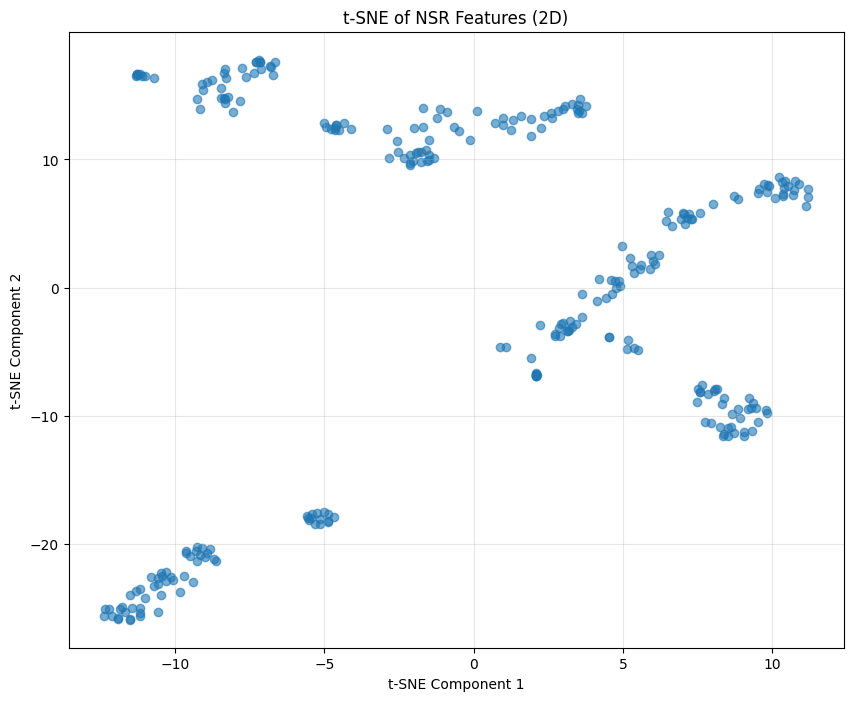

In [39]:
from sklearn.manifold import TSNE

# Apply t-SNE with 2 components
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
features_NSR_tsne = tsne.fit_transform(features_NSR_scaled)

# Plot the 2D t-SNE results
plt.figure(figsize=(10, 8))
plt.scatter(features_NSR_tsne[:, 0], features_NSR_tsne[:, 1], alpha=0.6)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE of NSR Features (2D)')
plt.grid(True, alpha=0.3)
plt.show()

In [50]:
!pip install umap-learn -y



Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: -y


c:\Users\47470482\AppData\Local\anaconda3\envs\torch-env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\47470482\AppData\Local\anaconda3\envs\torch-env\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


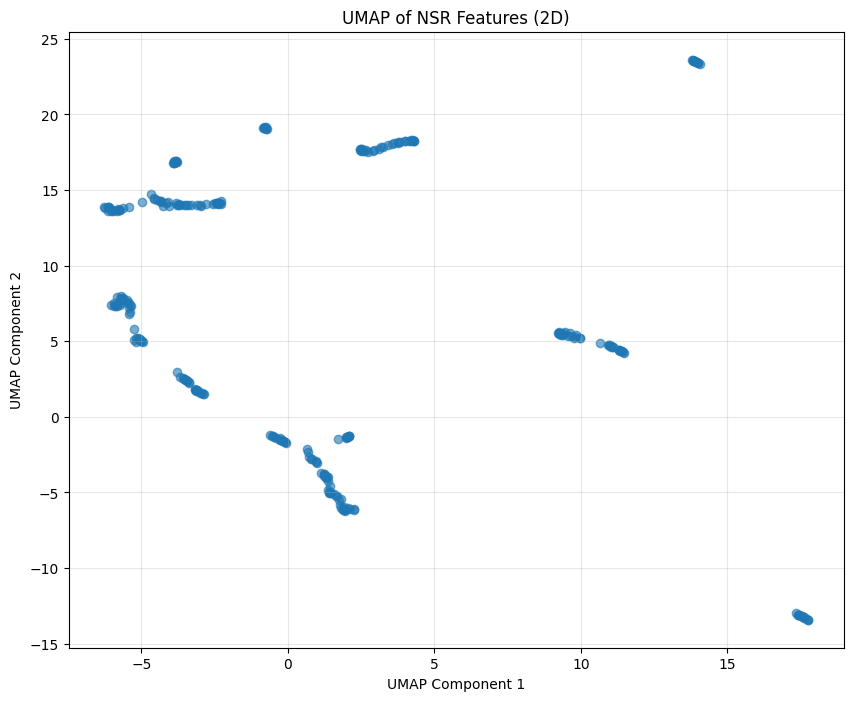

In [52]:
from umap.umap_ import UMAP

# Apply UMAP with 2 components
umap = UMAP(n_components=2, random_state=42)
features_NSR_umap = umap.fit_transform(features_NSR_scaled)

# Plot the 2D UMAP results
plt.figure(figsize=(10, 8))
plt.scatter(features_NSR_umap[:, 0], features_NSR_umap[:, 1], alpha=0.6)
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('UMAP of NSR Features (2D)')
plt.grid(True, alpha=0.3)
plt.show()

Total samples: 1000
Classes: label
NSR          283
AFIB         135
PVC          133
LBBBB        103
APB           66
RBBBB         62
Bigeminy      55
PR            45
WPW           21
AFL           20
SVTA          13
Trigeminy     13
Fusion        11
SDHB          10
VT            10
IVR           10
VFL           10
Name: count, dtype: int64

Features table (first 10 rows):
       mean       std    median       min       max    ptp  variance  \
0  0.160284  0.228847  0.115485 -0.144515  1.705485  1.850  0.052371   
1  0.270717  0.225989  0.235485 -0.494515  1.595485  2.090  0.051071   
2  0.131302  0.266043  0.060485 -0.204515  1.845485  2.050  0.070779   
3 -0.529288  0.337955 -0.604515 -0.959515  1.075485  2.035  0.114213   
4  0.335085  0.299513  0.260485  0.110485  2.380485  2.270  0.089708   
5 -0.014426  0.279939  0.010485 -0.624515  1.545485  2.170  0.078366   
6  0.128769  0.258006  0.092985 -0.249515  2.000485  2.250  0.066567   
7 -0.229447  0.326075 -0.269515 -1.274515

c:\Users\47470482\AppData\Local\anaconda3\envs\torch-env\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


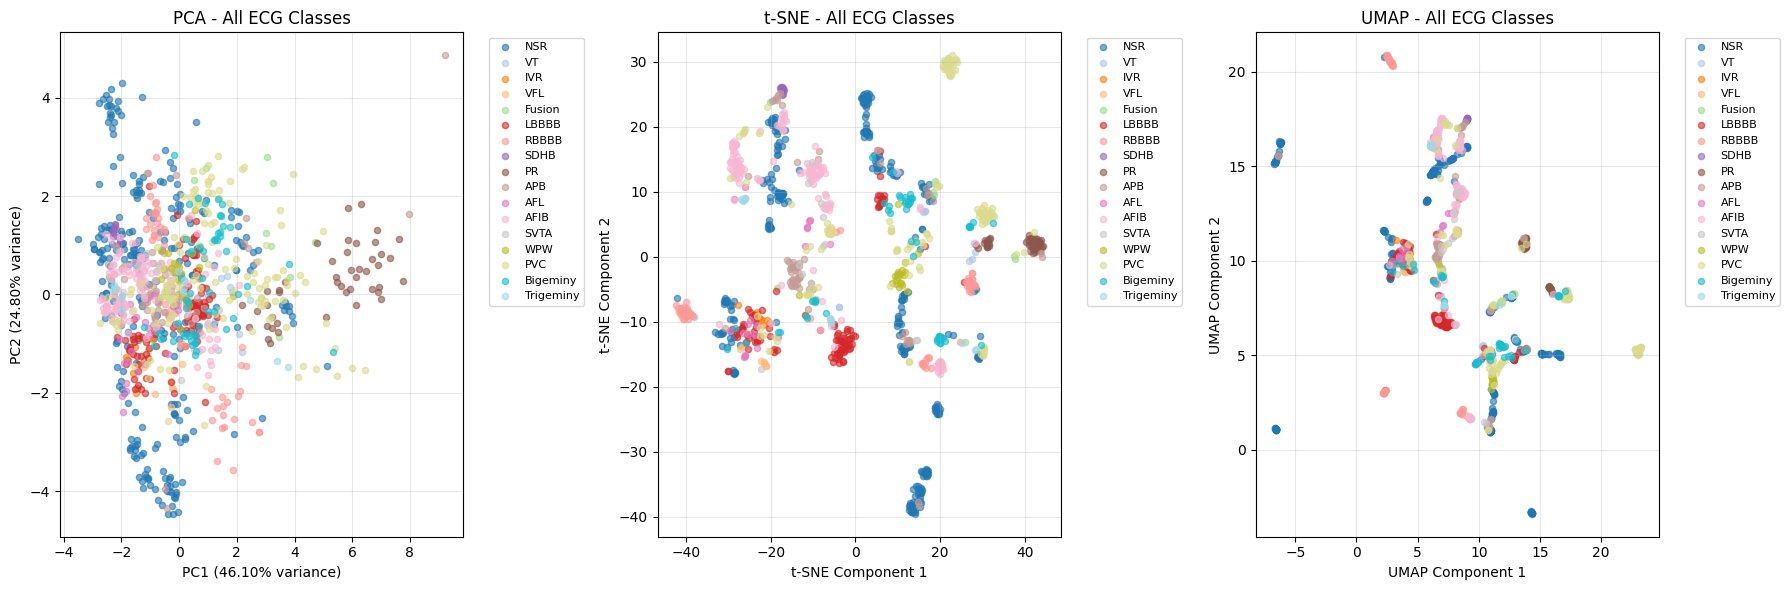


PCA total variance explained: 70.90%


In [53]:
# Create a comprehensive dataset with all features and labels
all_features = []
all_labels = []

# Extract features for all classes
for label in labels:
    class_data = data[label]
    class_features = [statistics_extract_features(signal) for signal in class_data]
    all_features.extend(class_features)
    all_labels.extend([label] * len(class_features))

# Create DataFrame with all features
features_df = pd.DataFrame(all_features)
features_df['label'] = all_labels

print(f"Total samples: {len(features_df)}")
print(f"Classes: {features_df['label'].value_counts()}")
print("\nFeatures table (first 10 rows):")
print(features_df.head(10))

# Separate features from labels for dimensionality reduction
X = features_df.drop('label', axis=1)
y = features_df['label']

# Normalize features
X_scaled = scaler.fit_transform(X)

# Apply dimensionality reduction techniques
print("\nApplying dimensionality reduction...")

# PCA
pca_full = PCA(n_components=2)
X_pca = pca_full.fit_transform(X_scaled)

# t-SNE
tsne_full = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne_full.fit_transform(X_scaled)

# UMAP
umap_full = UMAP(n_components=2, random_state=42)
X_umap = umap_full.fit_transform(X_scaled)

# Create visualizations
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Get unique labels and colors
unique_labels = y.unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_labels)))

# PCA plot
for i, label in enumerate(unique_labels):
    mask = y == label
    axes[0].scatter(X_pca[mask, 0], X_pca[mask, 1], 
                   c=[colors[i]], label=label, alpha=0.6, s=20)
axes[0].set_xlabel(f'PC1 ({pca_full.explained_variance_ratio_[0]:.2%} variance)')
axes[0].set_ylabel(f'PC2 ({pca_full.explained_variance_ratio_[1]:.2%} variance)')
axes[0].set_title('PCA - All ECG Classes')
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
axes[0].grid(True, alpha=0.3)

# t-SNE plot
for i, label in enumerate(unique_labels):
    mask = y == label
    axes[1].scatter(X_tsne[mask, 0], X_tsne[mask, 1], 
                   c=[colors[i]], label=label, alpha=0.6, s=20)
axes[1].set_xlabel('t-SNE Component 1')
axes[1].set_ylabel('t-SNE Component 2')
axes[1].set_title('t-SNE - All ECG Classes')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
axes[1].grid(True, alpha=0.3)

# UMAP plot
for i, label in enumerate(unique_labels):
    mask = y == label
    axes[2].scatter(X_umap[mask, 0], X_umap[mask, 1], 
                   c=[colors[i]], label=label, alpha=0.6, s=20)
axes[2].set_xlabel('UMAP Component 1')
axes[2].set_ylabel('UMAP Component 2')
axes[2].set_title('UMAP - All ECG Classes')
axes[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nPCA total variance explained: {sum(pca_full.explained_variance_ratio_):.2%}")

Applying 3D dimensionality reduction...


c:\Users\47470482\AppData\Local\anaconda3\envs\torch-env\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


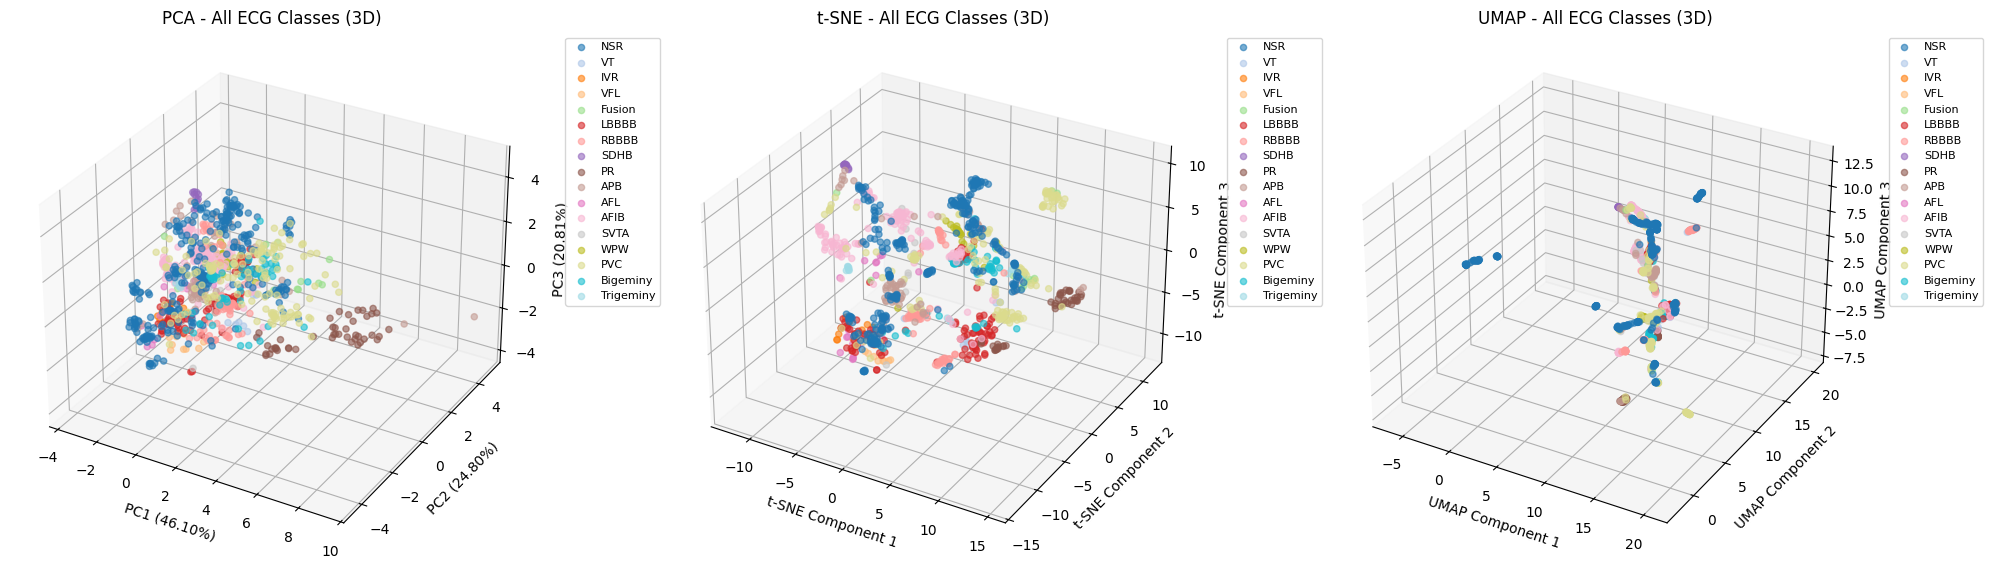


PCA total variance explained (3D): 91.71%
Individual components: PC1: 46.10%, PC2: 24.80%, PC3: 20.81%


In [54]:
from mpl_toolkits.mplot3d import Axes3D

# Apply dimensionality reduction techniques with 3 components
print("Applying 3D dimensionality reduction...")

# PCA with 3 components
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# t-SNE with 3 components
tsne_3d = TSNE(n_components=3, random_state=42, perplexity=30)
X_tsne_3d = tsne_3d.fit_transform(X_scaled)

# UMAP with 3 components
umap_3d = UMAP(n_components=3, random_state=42)
X_umap_3d = umap_3d.fit_transform(X_scaled)

# Create 3D visualizations
fig = plt.figure(figsize=(20, 6))

# Get unique labels and colors
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_labels)))

# PCA 3D plot
ax1 = fig.add_subplot(131, projection='3d')
for i, label in enumerate(unique_labels):
    mask = y == label
    ax1.scatter(X_pca_3d[mask, 0], X_pca_3d[mask, 1], X_pca_3d[mask, 2], 
               c=[colors[i]], label=label, alpha=0.6, s=20)
ax1.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.2%})')
ax1.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.2%})')
ax1.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.2%})')
ax1.set_title('PCA - All ECG Classes (3D)')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

# t-SNE 3D plot
ax2 = fig.add_subplot(132, projection='3d')
for i, label in enumerate(unique_labels):
    mask = y == label
    ax2.scatter(X_tsne_3d[mask, 0], X_tsne_3d[mask, 1], X_tsne_3d[mask, 2], 
               c=[colors[i]], label=label, alpha=0.6, s=20)
ax2.set_xlabel('t-SNE Component 1')
ax2.set_ylabel('t-SNE Component 2')
ax2.set_zlabel('t-SNE Component 3')
ax2.set_title('t-SNE - All ECG Classes (3D)')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

# UMAP 3D plot
ax3 = fig.add_subplot(133, projection='3d')
for i, label in enumerate(unique_labels):
    mask = y == label
    ax3.scatter(X_umap_3d[mask, 0], X_umap_3d[mask, 1], X_umap_3d[mask, 2], 
               c=[colors[i]], label=label, alpha=0.6, s=20)
ax3.set_xlabel('UMAP Component 1')
ax3.set_ylabel('UMAP Component 2')
ax3.set_zlabel('UMAP Component 3')
ax3.set_title('UMAP - All ECG Classes (3D)')
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

plt.tight_layout()
plt.show()

print(f"\nPCA total variance explained (3D): {sum(pca_3d.explained_variance_ratio_):.2%}")
print(f"Individual components: PC1: {pca_3d.explained_variance_ratio_[0]:.2%}, PC2: {pca_3d.explained_variance_ratio_[1]:.2%}, PC3: {pca_3d.explained_variance_ratio_[2]:.2%}")

## Testing more features

In [65]:
# ecg_features_neurokit_only.py
import numpy as np
import pandas as pd
from dataclasses import dataclass
from typing import Dict, Any
import neurokit2 as nk


# ---------- PSD bandpower using NeuroKit2 only ----------
def _bandpower_psd(x, fs, fmin, fmax):
    """Bandpower via nk.signal_psd (Welch under the hood)."""
    if len(x) < fs:
        return np.nan
    try:
        psd = nk.signal_psd(x, sampling_rate=fs, method="welch", min_frequency=0.0, max_frequency=fs/2)
        # psd is a DataFrame with columns ["Frequency", "Power"]
        f = psd["Frequency"].to_numpy()
        p = psd["Power"].to_numpy()
        sel = (f >= fmin) & (f <= fmax)
        if not np.any(sel):
            return np.nan
        # integrate with trapezoid rule (NumPy)
        return float(np.trapz(p[sel], f[sel]))
    except Exception:
        return np.nan


def _nanmean(x): return float(np.nanmean(x)) if np.size(x) else np.nan
def _nanstd(x):  return float(np.nanstd(x, ddof=1)) if np.size(x) > 1 else np.nan


@dataclass
class ECGFeatureExtractorNK:
    fs: float
    clean_method: str = "neurokit"
    delineate_method: str = "dwt"

    def process(self, ecg: np.ndarray) -> Dict[str, Any]:
        try:
            signals, info = nk.ecg_process(ecg, sampling_rate=self.fs, method=self.clean_method)
            cleaned = signals["ECG_Clean"].to_numpy()
            rpeaks = np.array(info["ECG_R_Peaks"], dtype=int)
            
            # Handle nk.ecg_delineate which returns (signals, waves) tuple
            try:
                delineate_signals, waves = nk.ecg_delineate(
                    cleaned, rpeaks=rpeaks, sampling_rate=self.fs, method=self.delineate_method
                )
                # waves is the dictionary we need
                delineate = waves
            except Exception as e:
                print(f"Warning: ECG delineation failed: {e}")
                delineate = {}
                
            return {"signals": signals, "info": info, "cleaned": cleaned, "rpeaks": rpeaks, "delineate": delineate}
        except Exception as e:
            # Return minimal structure if processing fails
            return {"signals": None, "info": None, "cleaned": ecg, "rpeaks": np.array([]), "delineate": {}}

    # -------- General ECG features --------
    def general_features(self, ecg: np.ndarray) -> Dict[str, Any]:
        P = self.process(ecg)
        fs, rpeaks, cleaned, delineate = self.fs, P["rpeaks"], P["cleaned"], P["delineate"]
        out: Dict[str, Any] = {}

        # HR, RR, simple HRV
        if rpeaks.size >= 2:
            rr = np.diff(rpeaks) / fs
            hr = 60.0 / rr
            diffs = np.diff(rr)
            out.update({
                "hr_mean_bpm": _nanmean(hr),
                "hr_std_bpm":  _nanstd(hr),
                "rr_mean_s":   _nanmean(rr),
                "rr_std_s":    _nanstd(rr),
                "rr_cv":       (_nanstd(rr) / _nanmean(rr)) if _nanmean(rr) and _nanmean(rr) > 0 else np.nan,
                "rmssd_s":     np.sqrt(_nanmean(diffs**2)) if diffs.size else np.nan,
                "sdnn_s":      _nanstd(rr),
                "pnn50_pct":   (np.mean(np.abs(diffs) > 0.05) * 100.0) if diffs.size else np.nan,
            })
        else:
            out.update({"hr_mean_bpm": np.nan, "hr_std_bpm": np.nan, "rr_mean_s": np.nan,
                        "rr_std_s": np.nan, "rr_cv": np.nan, "rmssd_s": np.nan,
                        "sdnn_s": np.nan, "pnn50_pct": np.nan})
        out.update({"n_beats": int(rpeaks.size), "duration_s": float(len(ecg) / fs)})

        # PR, QRS, QT, QTc from delineation - handle missing delineation gracefully
        QRS_on   = np.array(delineate.get("ECG_QRS_Onsets", []), dtype=float) if delineate else np.array([])
        QRS_off  = np.array(delineate.get("ECG_QRS_Offsets", []), dtype=float) if delineate else np.array([])
        T_off    = np.array(delineate.get("ECG_T_Offsets", []), dtype=float) if delineate else np.array([])
        P_peaks  = np.array(delineate.get("ECG_P_Peaks", []), dtype=float) if delineate else np.array([])

        # Remove NaN values from the arrays
        QRS_on = QRS_on[~np.isnan(QRS_on)] if QRS_on.size else np.array([])
        QRS_off = QRS_off[~np.isnan(QRS_off)] if QRS_off.size else np.array([])
        T_off = T_off[~np.isnan(T_off)] if T_off.size else np.array([])
        P_peaks = P_peaks[~np.isnan(P_peaks)] if P_peaks.size else np.array([])

        qrs_durs = (QRS_off - QRS_on) / fs if QRS_on.size and QRS_off.size and len(QRS_on) == len(QRS_off) else np.array([])
        qt_intervals = (T_off - QRS_on[:len(T_off)]) / fs if QRS_on.size and T_off.size else np.array([])

        # PR: pair previous P to next QRS within plausible window
        PRs = []
        if P_peaks.size and QRS_on.size:
            ip = 0
            for iq in range(len(QRS_on)):
                while ip + 1 < len(P_peaks) and P_peaks[ip + 1] < QRS_on[iq]:
                    ip += 1
                if ip < len(P_peaks):
                    dt = (QRS_on[iq] - P_peaks[ip]) / fs
                    if 0.06 <= dt <= 0.25:
                        PRs.append(dt)
        PRs = np.array(PRs, dtype=float)

        out.update({
            "pr_mean_s":  _nanmean(PRs),
            "pr_std_s":   _nanstd(PRs),
            "qrs_mean_s": _nanmean(qrs_durs),
            "qrs_std_s":  _nanstd(qrs_durs),
            "qt_mean_s":  _nanmean(qt_intervals),
            "qt_std_s":   _nanstd(qt_intervals),
        })

        rr_mean = out["rr_mean_s"]
        qt_mean = out["qt_mean_s"]
        if np.isfinite(qt_mean) and np.isfinite(rr_mean) and rr_mean > 0:
            out["qtc_bazett_s"] = qt_mean / np.sqrt(rr_mean)
            out["qtc_fridericia_s"] = qt_mean / (rr_mean ** (1/3))
        else:
            out["qtc_bazett_s"] = np.nan
            out["qtc_fridericia_s"] = np.nan

        # Amplitude proxies at detected peaks (P/R/T)
        if P["signals"] is not None:
            s = P["signals"]["ECG_Clean"].to_numpy()
            R_idx = rpeaks
            P_idx = P_peaks.astype(int) if P_peaks.size else np.array([], dtype=int)
            T_idx = np.array(delineate.get("ECG_T_Peaks", []), dtype=float) if delineate and delineate.get("ECG_T_Peaks") is not None else np.array([])
            # Remove NaN values and convert to int
            T_idx = T_idx[~np.isnan(T_idx)].astype(int) if T_idx.size else np.array([], dtype=int)
            
            def _pick(idx): return s[np.clip(idx, 0, len(s)-1)] if idx.size else np.array([])
            R_amp, P_amp, T_amp = _pick(R_idx), _pick(P_idx), _pick(T_idx)

            # S amplitude: min within 60 ms after R
            S_amp = []
            for r in R_idx:
                end = min(r + int(0.06 * fs), len(s))
                if r+1 < end:
                    S_amp.append(np.min(s[r+1:end]))
            S_amp = np.array(S_amp)
        else:
            R_amp, P_amp, T_amp, S_amp = np.array([]), np.array([]), np.array([]), np.array([])

        out.update({
            "p_amp_mean": _nanmean(P_amp),
            "r_amp_mean": _nanmean(R_amp),
            "t_amp_mean": _nanmean(T_amp),
            "rs_ratio_mean": (_nanmean(R_amp) / abs(_nanmean(S_amp))) if np.isfinite(_nanmean(S_amp)) and _nanmean(S_amp) != 0 else np.nan,
        })

        # Frequency domain & entropy (AF cues live here too)
        out.update({
            "power_0_5_40": _bandpower_psd(cleaned, fs, 0.5, 40.0),
            "power_4_9":    _bandpower_psd(cleaned, fs, 4.0, 9.0),
        })
        try:
            out["sampen"] = float(nk.entropy_sample(cleaned))
        except Exception:
            out["sampen"] = np.nan

        return out

    # -------- Lead II pattern-oriented cues --------
    def leadII_pattern_features(self, ecg: np.ndarray) -> Dict[str, Any]:
        P = self.process(ecg)
        fs, cleaned, rpeaks, delineate = self.fs, P["cleaned"], P["rpeaks"], P["delineate"]
        feats: Dict[str, Any] = {}

        # RR variability
        if rpeaks.size >= 3:
            rr = np.diff(rpeaks) / fs
            rr_cv = np.nanstd(rr, ddof=1) / np.nanmean(rr) if np.nanmean(rr) > 0 else np.nan
            rr_rmssd = np.sqrt(np.nanmean(np.diff(rr) ** 2)) if rr.size >= 2 else np.nan
        else:
            rr_cv, rr_rmssd = np.nan, np.nan

        # P presence ratio - handle missing delineation
        P_peaks = np.array(delineate.get("ECG_P_Peaks", []), dtype=float) if delineate else np.array([])
        QRS_on  = np.array(delineate.get("ECG_QRS_Onsets", []), dtype=float) if delineate else np.array([])
        QRS_off = np.array(delineate.get("ECG_QRS_Offsets", []), dtype=float) if delineate else np.array([])

        # Remove NaN values
        P_peaks = P_peaks[~np.isnan(P_peaks)] if P_peaks.size else np.array([])
        QRS_on = QRS_on[~np.isnan(QRS_on)] if QRS_on.size else np.array([])
        QRS_off = QRS_off[~np.isnan(QRS_off)] if QRS_off.size else np.array([])

        has_p = 0
        if P_peaks.size and QRS_on.size:
            ip = 0
            for iq in range(len(QRS_on)):
                while ip + 1 < len(P_peaks) and P_peaks[ip + 1] < QRS_on[iq]:
                    ip += 1
                if ip < len(P_peaks):
                    dt = (QRS_on[iq] - P_peaks[ip]) / fs
                    if 0.06 <= dt <= 0.25:
                        has_p += 1
        p_presence_ratio = (has_p / len(QRS_on)) if QRS_on.size else np.nan

        # AF f-wave energy ratio (4–9 vs 0.5–40 Hz) using NK PSD
        pow_4_9 = _bandpower_psd(cleaned, fs, 4.0, 9.0)
        pow_05_40 = _bandpower_psd(cleaned, fs, 0.5, 40.0)
        fwave_ratio = (pow_4_9 / pow_05_40) if (pow_05_40 and np.isfinite(pow_05_40) and pow_05_40 > 0) else np.nan

        feats.update({
            "nsr_rr_regular_cv": rr_cv,
            "nsr_p_presence_ratio": p_presence_ratio,
            "af_rr_irregularity_rmssd": rr_rmssd,
            "af_fwave_ratio_4_9_over_0_5_40": fwave_ratio,
        })

        # Atrial flutter sawtooth peakiness near ~5 Hz (relative band prominence)
        band_4_6 = _bandpower_psd(cleaned, fs, 4.0, 6.0)
        band_3_4 = _bandpower_psd(cleaned, fs, 3.0, 4.0)
        band_6_7 = _bandpower_psd(cleaned, fs, 6.0, 7.0)
        denom = (band_3_4 + band_6_7) if np.isfinite(band_3_4) and np.isfinite(band_6_7) else np.nan
        feats["aflutter_sawtooth_peakiness"] = (band_4_6 / denom) if denom and denom > 0 else np.nan

        # QRS width (BBB / PVC cue)
        qrs_dur = ((QRS_off - QRS_on) / fs) if (QRS_on.size and QRS_off.size and len(QRS_on) == len(QRS_off)) else np.array([])
        feats.update({
            "qrs_mean_s": _nanmean(qrs_dur),
            "qrs_wide_ratio_over_120ms": (np.mean(qrs_dur > 0.12) if qrs_dur.size else np.nan)
        })

        # Trigeminy heuristic: wide QRS + no preceding P in 60–250 ms; periodicity every 3rd beat
        pvc_flags = []
        if QRS_on.size:
            for i in range(QRS_on.size):
                is_wide = (qrs_dur[i] > 0.12) if i < len(qrs_dur) and np.isfinite(qrs_dur[i]) else False
                has_P = False
                if P_peaks.size:
                    j = np.searchsorted(P_peaks, QRS_on[i]) - 1
                    if j >= 0:
                        dt = (QRS_on[i] - P_peaks[j]) / fs
                        has_P = (0.06 <= dt <= 0.25)
                pvc_flags.append(bool(is_wide and not has_P))
        pvc_flags = np.array(pvc_flags, dtype=bool)

        trigeminy_score = np.nan
        if pvc_flags.size >= 6:
            expected = np.zeros_like(pvc_flags, dtype=bool)
            expected[2::3] = True
            mismatches = np.mean(pvc_flags != expected)
            trigeminy_score = 1.0 - mismatches

        feats.update({
            "trigeminy_periodicity_score_0to1": trigeminy_score,
            "pvc_ratio": float(np.mean(pvc_flags)) if pvc_flags.size else np.nan
        })

        return feats


# Convenience wrappers
def extract_general_features(ecg: np.ndarray, fs: float) -> Dict[str, Any]:
    return ECGFeatureExtractorNK(fs=fs).general_features(ecg)

def extract_leadII_pattern_features(ecg: np.ndarray, fs: float) -> Dict[str, Any]:
    return ECGFeatureExtractorNK(fs=fs).leadII_pattern_features(ecg)

In [67]:
#%pip install neurokit2 -q

# Generate more comprehensive features using the new extraction functions
print("Extracting comprehensive features for all classes...")

# Initialize lists to store features and labels
all_general_features = []
all_pattern_features = []
all_labels_comprehensive = []

# Set sampling frequency (assuming 360 Hz based on common ECG datasets)
fs = 360

# Extract features for each class using the new functions
for label in labels:
    print(f"Processing {label}...")
    class_data = data[label]
    
    for i, signal in enumerate(class_data):
        try:
            # Extract general ECG features
            general_feats = extract_general_features(signal, fs)
            
            # Extract Lead II pattern features
            pattern_feats = extract_leadII_pattern_features(signal, fs)
            
            # Combine all features
            combined_feats = {**general_feats, **pattern_feats}
            
            all_general_features.append(general_feats)
            all_pattern_features.append(pattern_feats)
            all_labels_comprehensive.append(label)
            
        except Exception as e:
            print(f"Error processing signal {i} from {label}: {e}")
            continue
    
    print(f"Completed {label}: {len([l for l in all_labels_comprehensive if l == label])} samples processed")

# Check if we have any features extracted
if len(all_general_features) == 0:
    print("No features were extracted successfully. Please check the neurokit2 installation and feature extraction functions.")
else:
    # Create comprehensive features DataFrame
    general_features_df = pd.DataFrame(all_general_features)
    pattern_features_df = pd.DataFrame(all_pattern_features)
    
    # Combine general and pattern features
    if not general_features_df.empty and not pattern_features_df.empty:
        comprehensive_features_df = pd.concat([general_features_df, pattern_features_df], axis=1)
    elif not general_features_df.empty:
        comprehensive_features_df = general_features_df.copy()
    elif not pattern_features_df.empty:
        comprehensive_features_df = pattern_features_df.copy()
    else:
        print("Both feature DataFrames are empty!")
        comprehensive_features_df = pd.DataFrame()
    
    if not comprehensive_features_df.empty:
        comprehensive_features_df['label'] = all_labels_comprehensive
        
        print(f"\nComprehensive features extracted:")
        print(f"Total samples: {len(comprehensive_features_df)}")
        print(f"Total features: {len(comprehensive_features_df.columns) - 1}")
        print(f"\nFeature columns:")
        print(list(comprehensive_features_df.columns[:-1]))
        
        # Handle any NaN values by filling with median
        print(f"\nHandling missing values...")
        numeric_columns = comprehensive_features_df.select_dtypes(include=[np.number]).columns
        comprehensive_features_df[numeric_columns] = comprehensive_features_df[numeric_columns].fillna(
            comprehensive_features_df[numeric_columns].median()
        )
        
        # Separate features from labels
        X_comprehensive = comprehensive_features_df.drop('label', axis=1)
        y_comprehensive = comprehensive_features_df['label']
        
        # Scale the comprehensive features
        X_comprehensive_scaled = scaler.fit_transform(X_comprehensive)
        
        print(f"\nScaled comprehensive features shape: {X_comprehensive_scaled.shape}")
        print(f"Classes distribution:")
        print(y_comprehensive.value_counts().sort_index())
    else:
        print("No comprehensive features DataFrame could be created.")

Extracting comprehensive features for all classes...
Processing NSR...


C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\474

Completed NSR: 283 samples processed
Processing VT...


C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\474

Completed VT: 10 samples processed
Processing IVR...


C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\474

Completed IVR: 10 samples processed
Processing VFL...


C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
c:\Users\47470482\AppData\Local\anaconda3\envs\torch-env\Lib\site-packages\neurokit2\signal\signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
c:\Users\47470482\AppData\Local\anaconda3\envs\torch-

Completed VFL: 10 samples processed
Processing Fusion...


C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\474

Completed Fusion: 11 samples processed
Processing LBBBB...


C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\474

Completed LBBBB: 103 samples processed
Processing RBBBB...


C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\474

Completed RBBBB: 62 samples processed
Processing SDHB...


C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\474

Completed SDHB: 10 samples processed
Processing PR...


C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\474

Completed PR: 45 samples processed
Processing APB...


C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\474

Completed APB: 66 samples processed
Processing AFL...


C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\474

Completed AFL: 20 samples processed
Processing AFIB...


C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\474

Completed AFIB: 135 samples processed
Processing SVTA...


C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\474

Completed SVTA: 13 samples processed
Processing WPW...


C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\474

Completed WPW: 21 samples processed
Processing PVC...


C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\474

Completed PVC: 133 samples processed
Processing Bigeminy...


C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\474

Completed Bigeminy: 55 samples processed
Processing Trigeminy...


C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
C:\Users\474

Completed Trigeminy: 13 samples processed

Comprehensive features extracted:
Total samples: 1000
Total features: 34

Feature columns:
['hr_mean_bpm', 'hr_std_bpm', 'rr_mean_s', 'rr_std_s', 'rr_cv', 'rmssd_s', 'sdnn_s', 'pnn50_pct', 'n_beats', 'duration_s', 'pr_mean_s', 'pr_std_s', 'qrs_mean_s', 'qrs_std_s', 'qt_mean_s', 'qt_std_s', 'qtc_bazett_s', 'qtc_fridericia_s', 'p_amp_mean', 'r_amp_mean', 't_amp_mean', 'rs_ratio_mean', 'power_0_5_40', 'power_4_9', 'sampen', 'nsr_rr_regular_cv', 'nsr_p_presence_ratio', 'af_rr_irregularity_rmssd', 'af_fwave_ratio_4_9_over_0_5_40', 'aflutter_sawtooth_peakiness', 'qrs_mean_s', 'qrs_wide_ratio_over_120ms', 'trigeminy_periodicity_score_0to1', 'pvc_ratio']

Handling missing values...


ValueError: Columns must be same length as key

In [62]:
help(nk.ecg_delineate)

Help on function ecg_delineate in module neurokit2.ecg.ecg_delineate:

ecg_delineate(
    ecg_cleaned,
    rpeaks=None,
    sampling_rate=1000,
    method='dwt',
    show=False,
    show_type='peaks',
    check=False,
    **kwargs
)
    **Delineate QRS complex**

    Function to delineate the QRS complex, i.e., the different waves of the cardiac cycles. A
    typical ECG heartbeat consists of a P wave, a QRS complex and a T wave. The P wave represents
    the wave of depolarization that spreads from the SA-node throughout the atria. The QRS complex
    reflects the rapid depolarization of the right and left ventricles. Since the ventricles are
    the largest part of the heart, in terms of mass, the QRS complex usually has a much larger
    amplitude than the P-wave. The T wave represents the ventricular repolarization of the
    ventricles.On rare occasions, a U wave can be seen following the T wave. The U wave is believed
    to be related to the last remnants of ventricular repolari

In [ ]:
# # Test the feature extraction with a single sample
# print("Testing feature extraction with a single NSR sample...")
# test_signal = data['NSR'][0]
# print(f"Test signal shape: {test_signal.shape}")

# try:
#     # Test general features
#     general_feats = extract_general_features(test_signal, 360)
#     print(f"General features extracted: {len(general_feats)} features")
#     print(f"Sample features: {list(general_feats.keys())[:5]}")
    
#     # Test pattern features
#     pattern_feats = extract_leadII_pattern_features(test_signal, 360)
#     print(f"Pattern features extracted: {len(pattern_feats)} features")
#     print(f"Sample features: {list(pattern_feats.keys())[:5]}")
    
#     print("✅ Feature extraction working correctly!")
    
# except Exception as e:
#     print(f"❌ Error in feature extraction: {e}")
#     import traceback
#     traceback.print_exc()

Testing feature extraction with a single NSR sample...
Test signal shape: (3600,)


C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))


General features extracted: 25 features
Sample features: ['hr_mean_bpm', 'hr_std_bpm', 'rr_mean_s', 'rr_std_s', 'rr_cv']
Pattern features extracted: 9 features
Sample features: ['nsr_rr_regular_cv', 'nsr_p_presence_ratio', 'af_rr_irregularity_rmssd', 'af_fwave_ratio_4_9_over_0_5_40', 'aflutter_sawtooth_peakiness']
✅ Feature extraction working correctly!


C:\Users\47470482\AppData\Local\Temp\ipykernel_6752\1218668327.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(p[sel], f[sel]))
